# **About the dataset**
The dataset we will be using here is the Wine Quality data containing certain information about red and white wine.

Quality of the wine is based on sensory scores (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality between 0 (very bad) and 10 (very excellent).

This popular dataset is commonly used for predicting whether a particular wine is “good quality” or not.

In [ ]:
import pandas as pd      # This is the basic package for linear algebra and multidimensional array
import numpy as np       # Data analysis and manipulation tool

# To ignore warning
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Loading Data - After checking the data, data is separated by ";" instead of the default separator ","
# Add (sep=";") to the code
red_wine_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Wine_Dataset/winequality-red.csv", sep=";")

# **Data Analysis Techniques**

**Initial Review of Data**

In [ ]:
# To get the first 5 records using ".head()"; you can pass the number of record you want into () Eg. .head(7) or .head(10) and so on
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# To get the last 5 records using ".tail()"; you can pass the number of record you want into () Eg. .tail(7) or .tail(10) and so on
red_wine_data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
# Find out the total number of rows and columns in the dataset using “.shape”.
red_wine_data.shape

(1599, 12)

Observations:



*  Dataset comprises 1599 observations(rows) and 12 features(columns).
*  Out of the 12, one is the target variable and rest 11 are input variables.



In [ ]:
# To get a Statistical Overview using ".describe()"
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Observations:
*   Here the Median is represented by 50%(50th percentile) in the index column.This signifies the presence of Outliers. To better understand, let's assume that we have a data set with values: 2, 4, 6, 30. The mean value: 10.5, which is lower than the median of the data (5), is greatly affected by the extreme data point(30).
*   There is notably a large difference between 75th %tile and max values of predictors “residual sugar”, ” free sulfur dioxide”, ” total sulfur dioxide”. This indicates that some values of these 3 variables lie much farther from the general range of values( up to 75th %tile)

Thus, the observations 1 and 2 suggest that there are extreme values i.e Outliers in our dataset.

In [ ]:
# To get a summary of categorical columns separately, then we can use the parameter 'include'.
#red_wine_data.describe(include="object")
#red_wine_data.describe(include="all")
red_wine_data.describe(include="int")

,quality
count,1599.000000
mean,5.636023
std,0.807569
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,8.000000


**Exploring the Features**

In [ ]:
# To explore the features/columns of the datasets.
red_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Observations:

*   Six (6) columns contain spaces in their names
*   Will need to replace the spaces with underscores to allow python to be able to read them.

**Target Variable:**
The target variable of a dataset is the feature of a dataset about which you want to gain a deeper understanding. It is the variable that is, or should be the output.
Here, ***quality*** is the target variable

**Input Variable:**
One or more variables that are used to determine (or predict) the 'Target Variable' are known as ***Input Variables***. They are sometimes called Predictor Variable as well.

In [ ]:
# Target Variable is "quality"
# To obtain the Unique Values of Quality (Target Variable) using ".unique()"

red_wine_data["quality"].unique()

array([5, 6, 7, 4, 8, 3])

Observations:

The following are some of the key insights that are observable by just looking at the target variable:

*   Target variable/Dependent variable is discrete and categorical in nature.
*   “quality” score scale ranges from 1 to 10; 1 being poor and 10 being the best.
*   1,2,9 & 10 Quality ratings are not given by any observation. Only scores obtained are between 3 to 8.







In [ ]:
# To get the Frequency Counts of each Quality Value using ".value_counts()"
# To get the number of occurrences of each unique values

red_wine_data["quality"].value_counts()
red_wine_data.value_counts("quality")

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


Observations:


* This tells us the vote count of each quality score in descending order.
* “quality” has most values concentrated in the categories 5, 6 and 7.
* Only a few observations made for the categories 3 & 8.





**Renaming Columns**

'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', and 'total sulfur dioxide'

In [ ]:
# rename the columns which contain spaces in their names and replace the spaces with underscores
red_wine_data.rename(columns={"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity", "citric acid": "citric_acid", "residual sugar": "residual_sugar", "free sulfur dioxide": "free_sulfur_dioxide", "total sulfur dioxide": "total_sulfur_dioxide" }, inplace = True)

In [ ]:
red_wine_data.columns  # Check to confirm if the change has been effected

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

**Checking for Missing Values**

In [ ]:
# To detect missing values using "isnull()" or  "isna()" functions. Both of them do the same thing.
# Here the "isnull()" or  "isna()" functions detects the missing values while
# ".sum()" helps display the number of missing values in each column

# 1st Test
red_wine_data.isnull().sum()

# 2nd Test
red_wine_data.isna().mean()

,0
fixed_acidity,0.0
volatile_acidity,0.0
citric_acid,0.0
residual_sugar,0.0
chlorides,0.0
free_sulfur_dioxide,0.0
total_sulfur_dioxide,0.0
density,0.0
pH,0.0
sulphates,0.0


Observation:

There is no missing value in any column

In [ ]:
# returns information about the data frame including:
# data types of each column,
# number of null values in each column,
# and memory usage of the entire data.

red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Observations:

* The data has only float and integer values.
* There are no missing values


**Checking for Duplicates**

Duplicates might or might not affect the quality of data. Before deciding if they should be removed, it is essential to understand why they might have occurred in the first place.

In [ ]:
# Method 1:
duplicate_entries = red_wine_data.duplicated()
duplicate_entries.sum()

# Method 2:
duplicate_entries = red_wine_data[red_wine_data.duplicated()]
duplicate_entries.shape

(240, 12)

Observations:

There are 240 duplicates. The quality ratings for the same/similar wine were given by different wine tasters so there is a possibility of similar reviews. We can thus keep these duplicates.

# **Graphical Techniques**

**Importing Data Visualization Libraries**

In [ ]:
# Importing Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

**Separating Input and Target Variables**

First, we’ll be separating the input and target variables and assign them to X and y respectively so that we can directly access either of those when required.

In [ ]:
y = red_wine_data["quality"]       # Set quality as the "Target" variable. NB: you can also use y = red_wine_data.quality
x = red_wine_data.drop("quality", axis = 1)    # All column except quality are input columns

In [ ]:
y.head()
# y.shape

,quality
0,5
1,5
2,5
3,6
4,5


In [ ]:
x.head()
x.shape

(1599, 11)

Observations:
*   Dataset comprises 1599 observations(rows) and 11 input features(columns).
*   X now contains all the features except Quality.
*   y contains Quality.







**Histogram**



*   The key is that a histogram looks solely at quantitative variables while a bar chart looks at categorical variables.
*  That’s why the bars in a histogram are typically grouped together without spacing in between the bars.





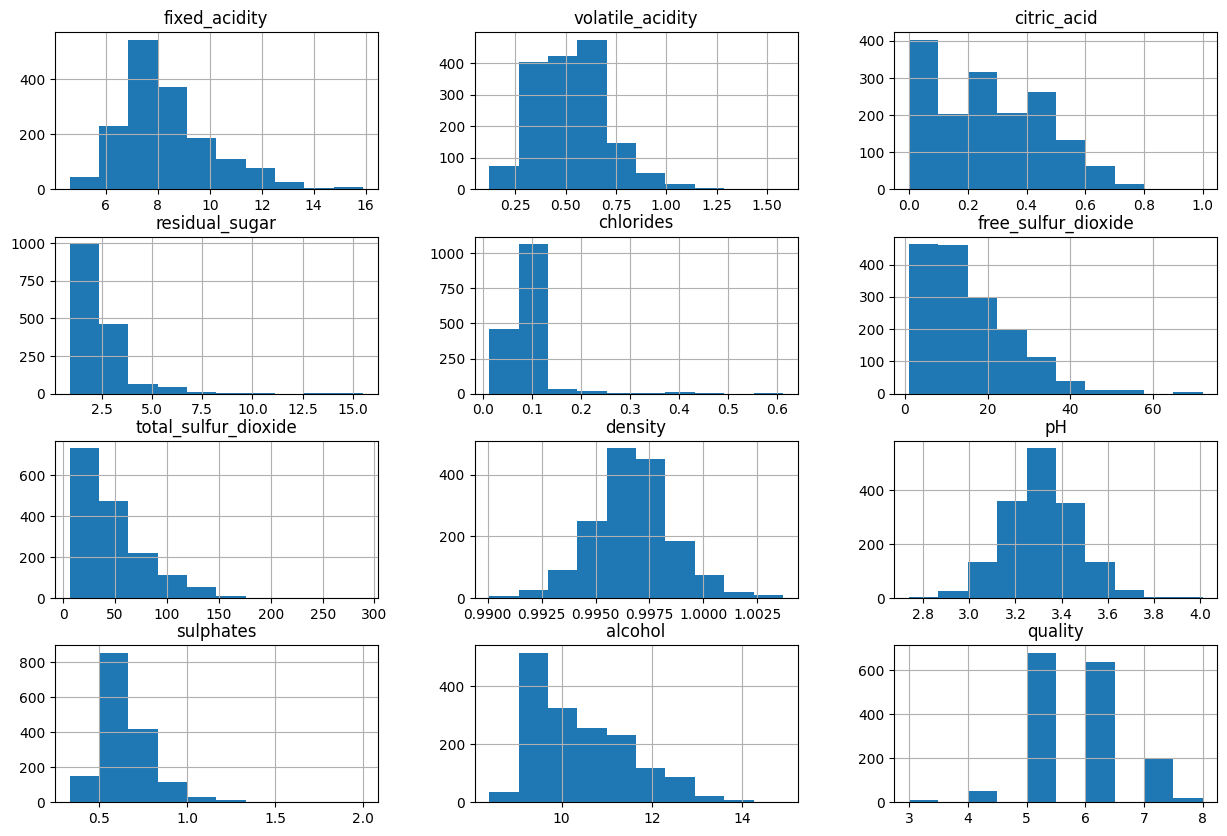

In [ ]:
# To plot a histogram by calling the hist() method on the DataFrame "red_wine_data",
# Output: get histograms for all the Series.

red_wine_data.hist(bins=10, figsize=(15,10))
plt.show()

**Observations:**

**Overview:**
Apart from "Alcohol", "Density", and "pH" that are somewhat like a normal distributions, all other variable expect "quality" are mostly skewed to the right.

**Alcohol:** The distribution appears somewhat normal, with a peak around 9-10.5.

**Density:** This variable appears to be tightly clustered around a specific value, with a distribution that is close to normal but very narrow.

**pH:** The distribution looks somewhat like a normal distribution, centered around 3.3.

**Sulphates:** The distribution is skewed to the right, with most values concentrated at the lower end and a long tail extending to higher values.

**Total Sulfur Dioxide:** This distribution is heavily skewed to the right, indicating the presence of outliers with high values.

**Free Sulfur Dioxide:** Similar to total sulfur dioxide, this distribution is also skewed to the right.

**Chlorides:** This distribution is highly skewed to the right, with a large concentration of values near zero and a long tail of higher values.

**Residual Sugar:** This distribution is also skewed to the right, with most values between 1 and 2.

**Citric Acid:** The distribution is skewed to the right, with a large number of wines having zero citric acid and a tail extending to higher values.

**Volatile Acidity:** The distribution is skewed to the right, with a peak around 0.4-0.6.

**Fixed Acidity:** The distribution is somewhat skewed to the right, with a peak around 7-8.

**Quality:** The histogram for quality shows that the majority of wines have a quality rating of 5 or 6, with fewer wines having ratings of 3, 4, 7, or 8. This confirms the observation made earlier from .value_counts().

These observations can help you understand the characteristics of the dataset and identify potential issues like skewed distributions or the presence of outliers, which might need to be addressed during data preprocessing for machine learning models.

**Correlation Matrix with Heatmap**

In [ ]:
# check how each feature is related to others using corr() function.

red_wine_data.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

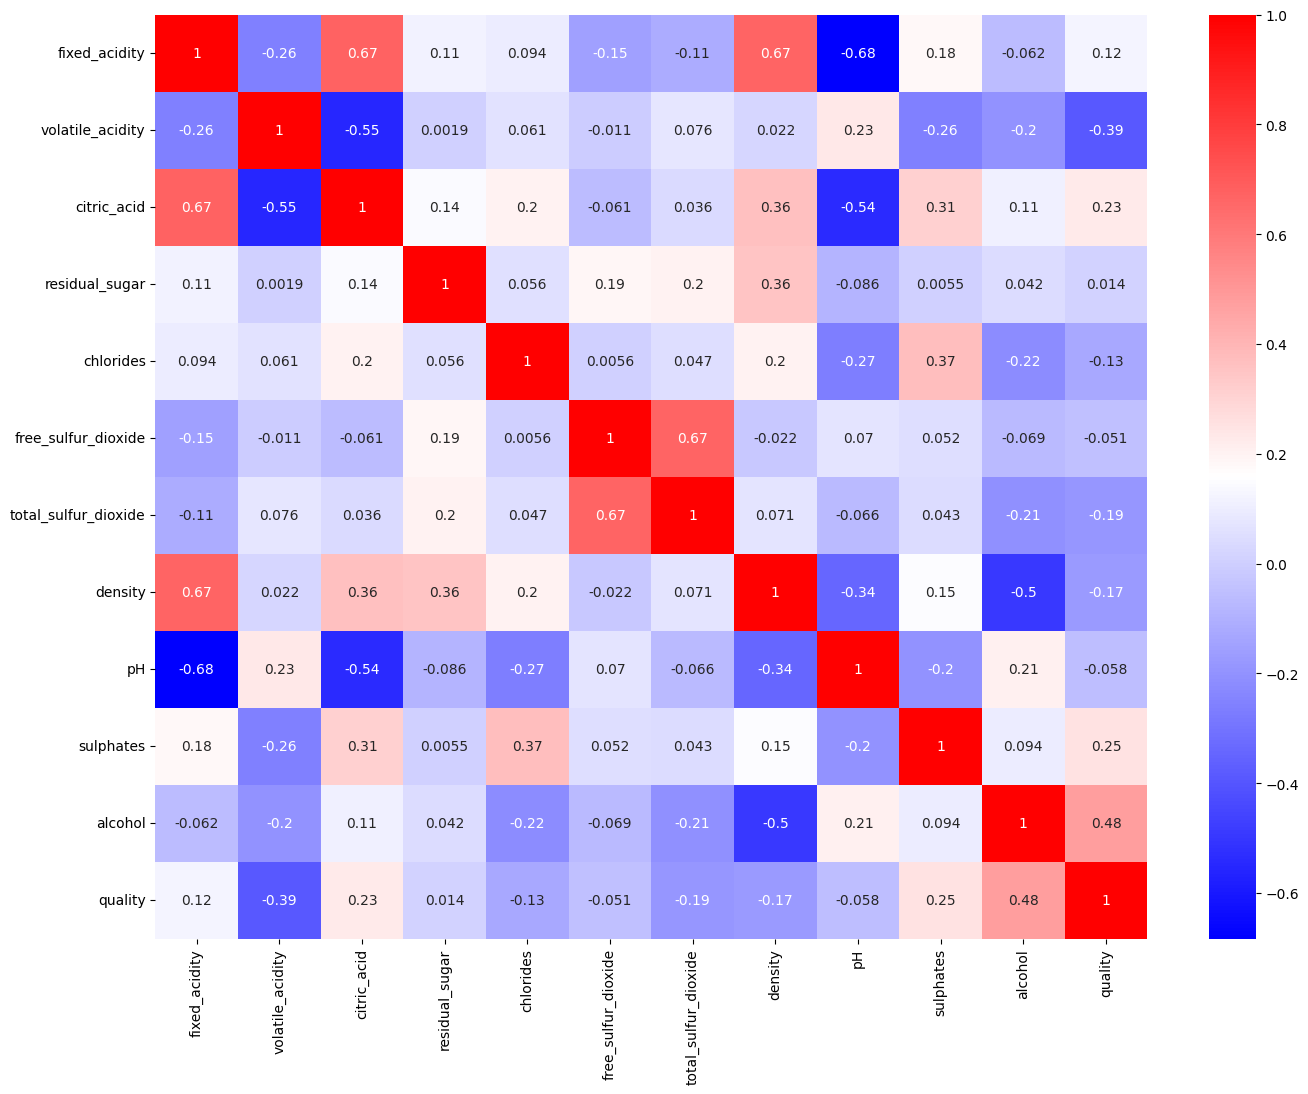

In [ ]:
#
plt.figure(figsize=(16,12))
sns.heatmap(red_wine_data.corr(), cmap="bwr", annot=True)   # annot=True : used to display the correlation value in the graph

**OBSERVATION - Correlations with 'quality' (the target variable):**

**Alcohol:** Has the strongest positive correlation with 'quality' (around 0.48). This suggests that wines with higher alcohol content tend to have higher quality ratings.

**Volatile Acidity:** Has the strongest negative correlation with 'quality' (around -0.39). This indicates that as volatile acidity increases, the quality rating tends to decrease.

**Citric Acid:** Shows a moderate positive correlation with 'quality' (around 0.23). This suggests that more citric acid might be associated with higher quality.

**Sulphates:** Also shows a moderate positive correlation with 'quality' (around 0.25). Higher sulphate levels might be related to better quality.

**Total Sulfur Dioxide:** Has a negative correlation with 'quality' (around -0.19). Higher levels of total sulfur dioxide seem to be associated with lower quality.

**Chlorides:** Shows a weak negative correlation with 'quality' (around -0.13).

**Fixed Acidity, Residual Sugar, Free Sulfur Dioxide, and pH:** These variables have relatively weak correlations with 'quality', both positive and negative (close to zero).

***OBSERVATION - Correlations between input variables: ***

There are some notable correlations between the input variables themselves. For example:

**fixed_acidity** has a strong positive correlation with citric_acid (around 0.67) and density (around 0.67), and a strong negative correlation with pH (around -0.68).

**free_sulfur_dioxide** has a strong positive correlation with total_sulfur_dioxide (around 0.67).

**citric_acid** has a moderate negative correlation with volatile_acidity (around -0.55).

**density** has a moderate negative correlation with alcohol (around -0.50).

**Overall Insight:**


*   The heatmap helps identify which features might be more important for predicting wine quality. 'Alcohol' and 'volatile acidity' appear to be the most influential based on their correlation strength with 'quality'.
*   The correlations between input variables can indicate potential multicollinearity, which is something to be aware of in certain modeling techniques.






**Count Plot**

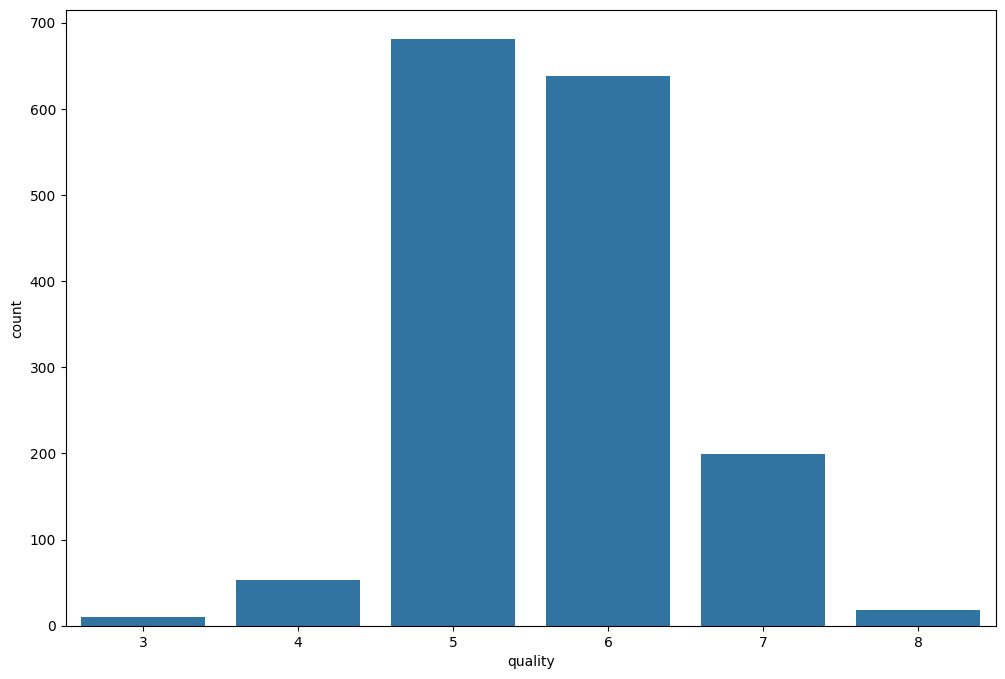

In [ ]:
# To graphically represent the number of occurrences or frequency
# for each categorical data of the variable quality using barplot or countplot.

plt.figure(figsize=(12,8))
sns.countplot(x=red_wine_data.quality)

#sns.countplot(x="quality", data=red_wine_data)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x=red_wine_data.quality)

#sns.countplot(x="quality", data=red_wine_data)
plt.show()

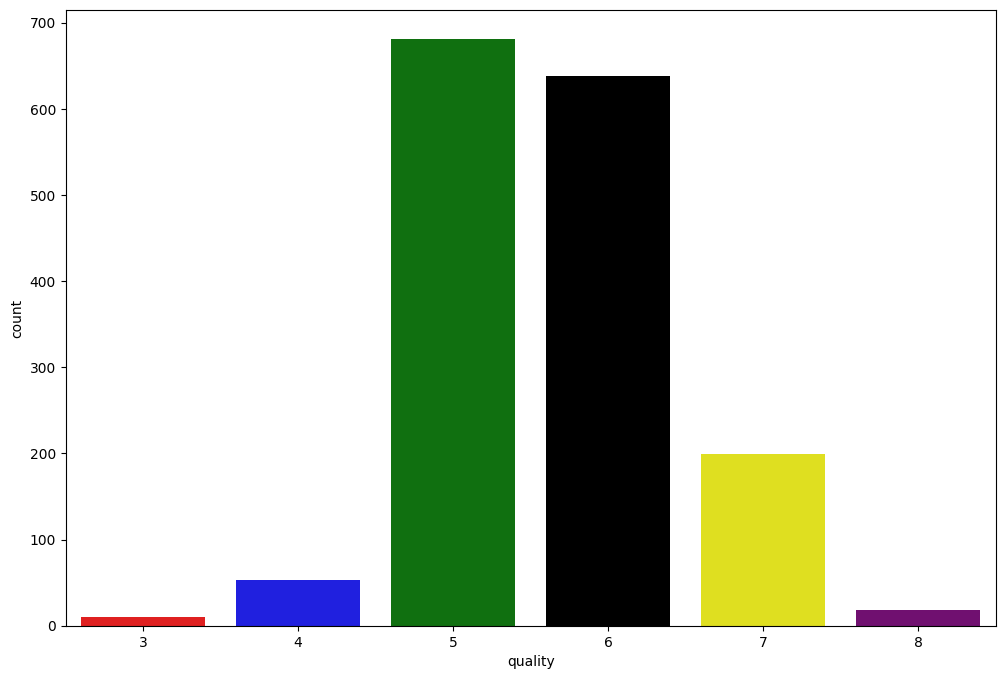

In [ ]:
# To graphically represent the number of occurrences or frequency
# for each categorical data of the variable quality using barplot or countplot.

plt.figure(figsize=(12,8))
sns.countplot(x=red_wine_data.quality, palette=['red', 'blue', 'green', 'black', 'yellow', 'purple'])
plt.show()

Observation:


*   The average (5-7) quality of wines are more than bad(1-4) and good(8-10) quality of wines.

**Pair Plot**

In [ ]:
# To quickly see the distribution of each variable and the relationships (correlations) between them.
sns.pairplot(red_wine_data)

Output hidden; open in https://colab.research.google.com to view.

Observation:

The correlation between fixed_acidity and citric_acid is 0.67 (you could find this value under the correlation matrix topic).


Looking at scatterplot for this pair of variables, we can see the positive linear correlation between these two variables. We can observe the upward trend, and also the points are not too dispersed.

**Box Plot**

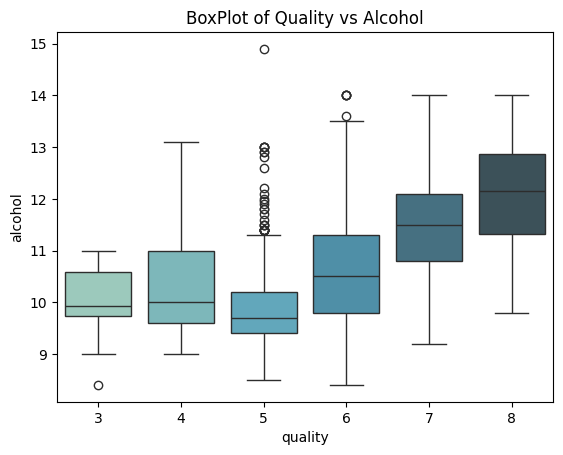

In [ ]:
# To get a visual sense of an entire range of data.
# Box plots divides data into its quartiles.

#plt.figure(figsize=(12,8))
sns.boxplot(x=red_wine_data.quality, y=red_wine_data.alcohol, palette="GnBu_d")
plt.title("BoxPlot of Quality vs Alcohol")
plt.show()

**Observations:**

**Higher Quality, Higher Alcohol:** There is a general trend showing that wines with higher quality ratings (especially 6, 7, and 8) tend to have higher median alcohol content and a wider range of alcohol percentages compared to wines with lower quality ratings (3, 4, and 5).

**Spread of Alcohol Content:** The spread of alcohol content (represented by the height of the boxes and the whiskers) seems to increase slightly with higher quality ratings, suggesting more variability in alcohol levels for better wines.

**Outliers:** The boxplot also shows potential outliers (individual points outside the whiskers) for several quality levels, indicating some wines have unusually high or low alcohol content for their given quality rating.

**Median Alcohol:** The median alcohol level (the line within the box) generally increases as the quality rating increases from 5 to 8.

**Overall Insight:**

In summary, the boxplot visually supports the earlier observation from the correlation matrix that alcohol content has a positive correlation with wine quality. Wines with higher alcohol are more likely to be rated as higher quality.

# **EDA Exercise**

**Overview**

The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history.

The training-set has 891 examples and 11 input variables + the target variable (survived). We have uploaded the dataset here and can be directly accessed with Pandas read_csv().

**Feature Description:**

PassengerId - this is just a generated Id of each passenger

Pclass - which class did the passenger ride in - first, second or third

Name

Sex - male or female

Age

SibSp - were the passenger's spouse or siblings with them on the ship

Parch - were the passenger's parents or children with them on the ship

Ticket - ticket number

Fare - ticket price

Cabin

Embarked - port of embarkation

Survived - did the passenger survive the sinking of the Titanic?


**Objective:** The broader objective is to build a model that would predict the survival probability of a person, given their basic features. In this exercise, you only need to focus on the Exploratory Data Analysis step.

**Important note:** If all the options of a question are correct, you only need to choose the last option stating All of the above.

**Steps to be performed:**

Load libraries

Load the dataset. Dataset Link: https://raw.githubusercontent.com/dphi-official/First_ML_Model/master/titanic.csv

Observe the first 5 rows of the data

In [ ]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
rms_titanic_data = pd.read_csv(" https://raw.githubusercontent.com/dphi-official/First_ML_Model/master/titanic.csv")

**Initial Review of Data**

In [ ]:
# Observe the first 5 rows of the data
rms_titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
rms_titanic_data.shape

(891, 12)

In [ ]:
rms_titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Question 1:**

**Write the appropriate code to find answers to the following questions:**

Select the correct statement about the titanic dataset


*   The 'Fare' feature has 0 missing values
*   The no. of male passengers are more than female passengers
*   All of the above

In [ ]:
# Solution 1
# Check if column "Fare" has no missing values

rms_titanic_data.isnull().sum()        # Output Satisfies the first option "The 'Fare' feature has 0 missing values"

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Check if male passengers > female passengers
rms_titanic_data['Sex'].value_counts()          # Output Satisfies the second option "The no. of male passengers are more than female passengers"

,count
Sex,
male,577
female,314


In [ ]:
if rms_titanic_data['Sex'].value_counts()["male"] > rms_titanic_data['Sex'].value_counts()["female"]:
  print("The no. of male passengers are more than female passengers")

The no. of male passengers are more than female passengers


**Answer to Question 1 is "All of the above"**

**Question 2:**

**Write the appropriate code to find answers to the following questions:**

What is the proportion of passengers who survived?

Note: In this question, we are asking for an answer as a proportion. Therefore, your answer should take a value between 0 and 1 rounded to 2 decimal places

*   0.38
*   0.39
*   0.40
*   0.41

In [ ]:
# Solutin 2:
# Call for the number of occurance of each unique value
# in the target variable "Survived"
rms_titanic_data['Survived'].value_counts()


,count
Survived,
0,549
1,342


In [ ]:
# METHOD 1
# Get the total number of passengers
total_passengers = rms_titanic_data['Survived'].value_counts().sum()

# Get the number of passengers that survived
passengers_survived = rms_titanic_data['Survived'].value_counts()[1]

# Calculate the proportion of passengers who survived
proportion_survived = passengers_survived / total_passengers

print(f"The proportion of passengers who survived is: {proportion_survived:.2f}")

The proportion of passengers who survived is: 0.38


In [ ]:
# METHOD 2
# Get the number of passengers that survived
passengers_survived = rms_titanic_data['Survived'] == 1

# Calculate the proportion of passengers who survived
proportion_survived = passengers_survived.mean()
print(f"The proportion of passengers who survived is: {proportion_survived:.2f}")

The proportion of passengers who survived is: 0.38


**Answer to Question 2 is "0.38"**

**Question 3:**

**Write the appropriate code to find answers to the following questions:**

What is the median Fare of the passengers?

Note: Write your answer up to 4 decimal places

*   14.4542
*   13.4542
*   32.2042
*   None of the above


In [ ]:
median_fare = rms_titanic_data['Fare'].median()
print(f"the median Fare of the passengers is: {median_fare:.4f}")

the median Fare of the passengers is: 14.4542


**Answer to Question 3 is "14.4542"**

**Question 4:**

**Write the appropriate code to find answers to the following questions:**

Select the correct option:

*   Percentage of women survived was more than percentage of men survived
*   It looks like first-class passengers were given priority to survive
*   It looks like Children were given priority to survive
*   All of the above


In [ ]:
women_count = rms_titanic_data[rms_titanic_data['Sex'] == 'female'].shape[0]
#men_count = rms_titanic_data[rms_titanic_data['Sex'] == 'male'].shape
print(women_count)
#print(men_count)

314


In [ ]:
# Solution 4:
# To check if the percentage of women survived was more than percentage of men survived

# METHOD 1
women_count = rms_titanic_data[rms_titanic_data['Sex'] == 'female'].shape[0]
men_count = rms_titanic_data[rms_titanic_data['Sex'] == 'male'].shape[0]

women_survived_count = rms_titanic_data[rms_titanic_data['Sex'] == 'female']['Survived'].sum()
men_survived_count =rms_titanic_data[rms_titanic_data["Sex"] == "male"]["Survived"].sum()


print(f"Number of women survived: {women_survived_count}")
print(f"Number of men survived: {men_survived_count}")

percentage_women_survived = (women_survived_count / women_count) * 100
percentage_men_survived = (men_survived_count / men_count) * 100

print(f"Percentage of women survived: {percentage_women_survived:.2f}%")
print(f"Percentage of men survived: {percentage_men_survived:.2f}%")

if percentage_women_survived  > percentage_men_survived :
  print("Percentage of women survived was more than percentage of men survived")   # This will satisfy option 1
else:
  print("Percentage of women survived was not more than percentage of men survived")



Number of women survived: 233
Number of men survived: 109
Percentage of women survived: 74.20%
Percentage of men survived: 18.89%
Percentage of women survived was more than percentage of men survived


In [ ]:
# METHOD 2: Improved Code

# Get the total number of women
women_count = rms_titanic_data[rms_titanic_data["Sex"] == "female"]
men_count = rms_titanic_data[rms_titanic_data["Sex"] == "male"]

# Calculate the percentage of survivals for each group
percentage_women_survived2 =  women_count["Survived"].mean() * 100
percentage_men_survived2 =  men_count["Survived"].mean() * 100

print(f"Percentage of women survived: {percentage_women_survived2:.2f}%")
print(f"Percentage of men survived: {percentage_men_survived2:.2f}%")

# Check if the percentage of women who survived is more than the men
if percentage_women_survived2 > percentage_men_survived2:
    print("Percentage of women survived was more than percentage of men survived")     # This will satisfy option 1
else:
    print("Percentage of women survived was not more than percentage of men survived")

Percentage of women survived: 74.20%
Percentage of men survived: 18.89%
Percentage of women survived was more than percentage of men survived


In [ ]:
# Solution 4: (Continues)
# To check if it looks like first-class passengers were given priority to survive
first_class_survivor = rms_titanic_data[rms_titanic_data["Pclass"] == 1] ["Survived"].mean()
print(f"Number of first-class passengers who survived: {first_class_survivor:.2f}" )
second_class_survivor = rms_titanic_data[rms_titanic_data["Pclass"] == 2] ["Survived"].mean()
print(f"Number of second-class passengers who survived: {second_class_survivor:.2f}")
third_class_survivor = rms_titanic_data[rms_titanic_data["Pclass"] == 3] ["Survived"].mean()
print(f"Number of third-class passengers who survived: {third_class_survivor:.2f}")

# Check for priority to survive
if first_class_survivor > second_class_survivor and first_class_survivor > third_class_survivor:  # This will satisfy option 2
    print("First-class passengers were given priority to survive")
else:
    print("First-class passengers were not given priority to survive")

Number of first-class passengers who survived: 0.63
Number of second-class passengers who survived: 0.47
Number of third-class passengers who survived: 0.24
First-class passengers were given priority to survive


In [ ]:
# Solution 4: (Continues)
# Check if it looks like Children were given priority to survive

# Define age groups
children = rms_titanic_data[rms_titanic_data['Age'] <= 12]
teenagers = rms_titanic_data[(rms_titanic_data['Age'] > 12) & (rms_titanic_data['Age'] <= 19)]
adults = rms_titanic_data[rms_titanic_data['Age'] > 19]

# Calculate the proportion of each age group who survived
children_survivors = children['Survived'].mean() if not children.empty else 0     # "if not children.empty else 0" is used for safeguard, in case there are no children in the data.
teenagers_survivors = teenagers["Survived"].mean() if not teenagers.empty else 0
adults_survivors = adults["Survived"].mean() if not adults.empty else 0

print(f"Children survival rate (Age <= 12): {children_survivors:.2f}")
print(f"Teenagers survival rate (Age 13-19): {teenagers_survivors:.2f}")
print(f"Adults survival rate (Age > 19): {adults_survivors:.2f}")

# Check for priority to survive
if (children_survivors > teenagers_survivors) and (children_survivors > adults_survivors):      # This will satisfy option 3
    print("Children were given priority to survive")
else:
    print("Children were not given priority to survive")



Children survival rate (Age <= 12): 0.58
Teenagers survival rate (Age 13-19): 0.41
Adults survival rate (Age > 19): 0.38
Children were given priority to survive


**Answer to Question 4 is "All of the above"**

**Question 5:**

**Write the appropriate code to find answers to the following questions:**

Create a subset of the data, only taking observations for which the passsenger survived. Call this newly created dataset as survived_passengers.

How many of the survived passengers had embarked from 'Southampton' i.e. 'S'?

*   644
*   217
*   168
*   77

In [ ]:
# Method 1: Following all instructions
# Create of subset for passenger survived
survived_passengers = rms_titanic_data[rms_titanic_data["Survived"] == 1]

# Get the number of survived passengers who embarked from Southampton
survived_passengers_southampton = survived_passengers[survived_passengers["Embarked"] == "S"].shape[0]

print(f"Number of survived passengers who embarked from Southampton (S): {survived_passengers_southampton}")


Number of survived passengers who embarked from Southampton (S): 217


In [ ]:
# Method 2: Note that this method does not follow the Question's instruction
# Get the number of survived passengers who embarked from Southampton using .loc
survived_southampton_count = rms_titanic_data.loc[(rms_titanic_data['Survived'] == 1) & (rms_titanic_data['Embarked'] == 'S')].shape[0]

print(f"Number of survived passengers who embarked from Southampton (S): {survived_southampton_count}")

Number of survived passengers who embarked from Southampton (S): 217


**Answer to Question 5 is "217"**

**Question 6:**

**Write the appropriate code to find answers to the following questions:**

Five highest fares of the passengers(not unique):

*   [512.3292, 512.3292, 512.3292, 263.0, 263.0]  
*   [510.3292, 512.3292, 512.3292, 263.0, 263.0]
*   [512.3292, 512.3292, 512.3292, 263.0, 256.0]
*   [512.3292, 520.3292, 512.3292, 263.0, 263.0]


In [ ]:
# Get the top five Fare for the cruise - !st five highest fare
Top_five_fare = rms_titanic_data.sort_values(by="Fare", ascending=False).head()
Top_five_fare_list = Top_five_fare["Fare"].tolist()

print(Top_five_fare_list)

[512.3292, 512.3292, 512.3292, 263.0, 263.0]


In [ ]:
# Get the top five Fare for the cruise - 1st five highest fare (chained methods)
top_five_fare_chained = rms_titanic_data.sort_values(by="Fare", ascending=False)["Fare"].head().tolist()

print(top_five_fare_chained)

[512.3292, 512.3292, 512.3292, 263.0, 263.0]


**Answer to Question 6 is "[512.3292, 512.3292, 512.3292, 263.0, 263.0]"**

**Question 7:**

**Write the appropriate code to find answers to the following questions:**

Median age of the passengers is:

*   27.0
*   28.0
*   29.0
*   30.0

In [ ]:
# To compute the Median age of the passengers
median_age = rms_titanic_data["Age"].median()
print(f"The median age of the passengers is: {median_age:.1f}")

The median age of the passengers is: 28.0


**Answer to Question 7 is "28.0"**

**Question 8:**

**Write the appropriate code to find answers to the following questions:**

Select the correct statement:

*   There are 891 unique values in the Name column
*   There are 714 unique values in the Name column

In [ ]:
# Get the total amount of unique values in the Name column
unique_names_count = rms_titanic_data["Name"].nunique()

print(f"Total number of unique names: {unique_names_count}")

Total number of unique names: 891


**Answer to Question 8 is "There are 891 unique values in the Name column"**

**Question 9:**

**Write the appropriate code to find answers to the following questions:**

Most of the passengers have _____ siblings/spouses.

*   5
*   1
*   0
*   2

In [ ]:
# Get the answer to: Most of the passengers have _____ siblings/spouses.
rms_titanic_data["SibSp"].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


**Answer to Question 9 is "0"**

**Question 10:**

**Write the appropriate code to find answers to the following questions:**

Which of the following feature plays an important role in the survival of the passengers?

*   Name
*   Age
*   Ticket

In [ ]:
# To determine which feature among "Name", "Age", and "Ticket" played an important role in the survival of the passengers
# Selecting the columns, including 'Survived' for correlation analysis
comparism_features = rms_titanic_data[["Name", "Age", "Ticket", "Survived"]]
print(comparism_features.head())

# Note: Selecting columns does not directly answer the question of feature importance.
# To determine feature importance, further analysis or modeling is required.
# For example, you could analyze survival rates by age groups, or explore patterns in names or tickets.

                                                Name   Age            Ticket  \
0                            Braund, Mr. Owen Harris  22.0         A/5 21171   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0          PC 17599   
2                             Heikkinen, Miss. Laina  26.0  STON/O2. 3101282   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0            113803   
4                           Allen, Mr. William Henry  35.0            373450   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0  


In [ ]:
# Calculate correlation matrix for numeric columns
# Exclude non-numeric columns like 'Name' and 'Ticket'
numeric_comparism_features = comparism_features.select_dtypes(include=['number'])
display(numeric_comparism_features.corr())

,Age,Survived
Age,1.000000,-0.077221
Survived,-0.077221,1.000000


In [ ]:
# Take the mean of the Age column
age_mean_before = rms_titanic_data['Age'].mean().round(2)
age_mean_before

np.float64(29.7)

In [ ]:
# Fill the missing values in the Age column with the mean of the Age column
age_mean_before_filled = rms_titanic_data['Age'].fillna(age_mean_before)
age_mean_before_filled.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [ ]:
age_mean_after = age_mean_before_filled.mean().round(2)
age_mean_after

np.float64(29.7)

In [ ]:
# Maximum Occurance Value for Embarked column
rms_titanic_data['Embarked'].value_counts()


,count
Embarked,
S,644
C,168
Q,77


In [ ]:
rms_titanic_data['Embarked'].fillna('S', inplace = True)

In [ ]:
rms_titanic_data['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77
